In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score

In [2]:
class_names = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]
data = []
labels = []
for i in os.listdir("Rice_Image_Dataset"):
    class_dir = os.path.join("Rice_Image_Dataset", i)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img = cv2.resize(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE),(64,64))
        data.append(img)
        labels.append(class_names.index(i))
data = np.array(data)
labels = np.array(labels)

In [3]:
unq_labels, unq_ind, unq_counts = np.unique(labels, return_index=True, return_counts=True)

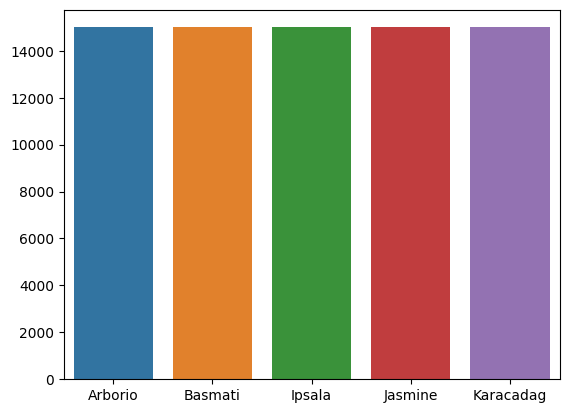

In [4]:
sns.barplot(x=[class_names[i] for i in unq_labels], y=unq_counts);

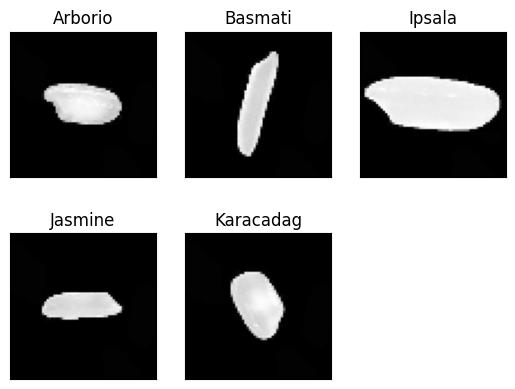

In [5]:
for i in range(len(unq_ind)):
    plt.subplot(2,3,i+1)
    plt.imshow(data[unq_ind[i]], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[labels[unq_ind[i]]])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size=0.5)
X_train = X_train/255
X_test = X_test/255
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, shuffle=False, test_size=0.4)

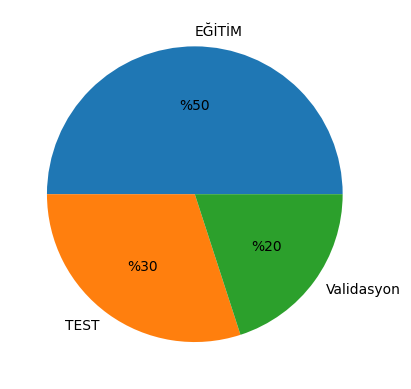

In [7]:
plt.pie([len(y_train), len(y_test), len(y_val)], labels=["EĞİTİM","TEST","Validasyon"], autopct="%%%1.0f");

In [8]:
model = Sequential()
model.add(Conv2D(32, 3, activation="relu", input_shape=(64,64,1)))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [9]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [10]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
586/586 [==============================] - 93s 157ms/step - loss: 0.1534 - accuracy: 0.9485 - val_loss: 0.0893 - val_accuracy: 0.9700
Epoch 2/20
586/586 [==============================] - 91s 156ms/step - loss: 0.0792 - accuracy: 0.9735 - val_loss: 0.0749 - val_accuracy: 0.9739
Epoch 3/20
586/586 [==============================] - 93s 159ms/step - loss: 0.0672 - accuracy: 0.9768 - val_loss: 0.0685 - val_accuracy: 0.9775
Epoch 4/20
586/586 [==============================] - 86s 147ms/step - loss: 0.0546 - accuracy: 0.9810 - val_loss: 0.0632 - val_accuracy: 0.9793
Epoch 5/20
586/586 [==============================] - 85s 145ms/step - loss: 0.0497 - accuracy: 0.9824 - val_loss: 0.0668 - val_accuracy: 0.9772
Epoch 6/20
586/586 [==============================] - 85s 145ms/step - loss: 0.0468 - accuracy: 0.9839 - val_loss: 0.0613 - val_accuracy: 0.9786
Epoch 7/20
586/586 [==============================] - 85s 144ms/step - loss: 0.0388 - accuracy: 0.9861 - val_loss: 0.0710 - val_ac

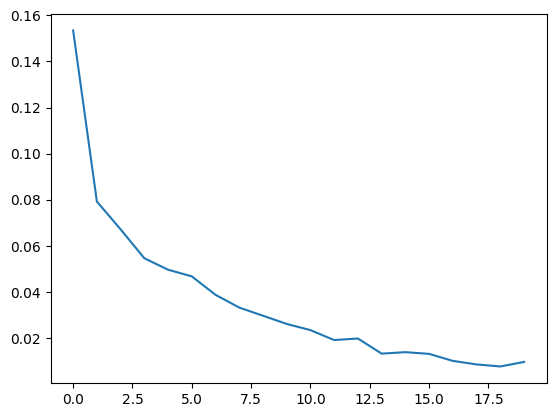

In [11]:
plt.plot(hist.history["loss"]);

In [12]:
model.predict(X_test[0].reshape(1,64,64)).argmax()

1/1 [==============================] - 0s 126ms/step


1

In [13]:
y_test[0]

1

1/1 [==============================] - 0s 14ms/step


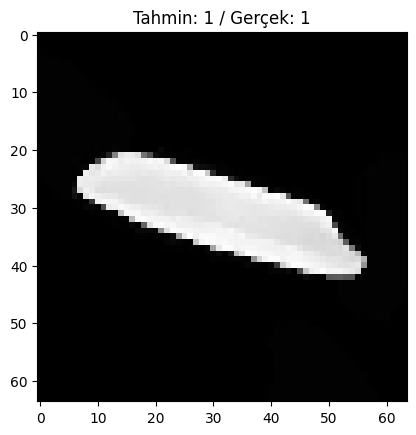

In [14]:
plt.imshow(X_test[0], cmap="gray")
plt.title(f"Tahmin: {model.predict(X_test[0].reshape(1,64,64)).argmax()} / Gerçek: {y_test[0]}");

In [ ]:
model.save("model.h5")

In [10]:
y_pred = model.predict(X_test)

704/704 [==============================] - 11s 16ms/step


In [27]:
accuracy_score(y_test, np.argmax(y_pred,axis=1))

0.9927111111111111